# Generalized Linear Models for Ordinal Data (Lab 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [1]:
!pip install statsmodels==0.13.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [3]:
!pip install wooldridge

import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs


import numpy as np
from scipy import stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example.  World Happiness Report Analysis

#### The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [4]:
HappinessDataFrame=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/M4DS202/main/data/world-happiness-report-2021.csv',sep=',')

In [5]:
HappinessDataFrame.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [6]:
### We select only a set of factors


HappinessDataFrame=HappinessDataFrame[['Ladder score','Country name','Regional indicator','Logged GDP per capita' ,'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [7]:
HappinessDataFrame.head(3)

,Ladder score,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.842,Finland,Western Europe,10.775,0.954,72.0,0.949,-0.098,0.186
1,7.620,Denmark,Western Europe,10.933,0.954,72.7,0.946,0.030,0.179
2,7.571,Switzerland,Western Europe,11.117,0.942,74.4,0.919,0.025,0.292


In [8]:
HappinessDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ladder score                  149 non-null    float64
 1   Country name                  149 non-null    object 
 2   Regional indicator            149 non-null    object 
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [9]:
## Let's remove spaces in the column names to avoid issues with statsmodels
HappinessDataFrame.columns = HappinessDataFrame.columns.str.replace(' ', '')

In [10]:
HappinessDataFrame

,Ladderscore,Countryname,Regionalindicator,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption
0,7.842,Finland,Western Europe,10.775,0.954,72.000,0.949,-0.098,0.186
1,7.620,Denmark,Western Europe,10.933,0.954,72.700,0.946,0.030,0.179
2,7.571,Switzerland,Western Europe,11.117,0.942,74.400,0.919,0.025,0.292
3,7.554,Iceland,Western Europe,10.878,0.983,73.000,0.955,0.160,0.673
4,7.464,Netherlands,Western Europe,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,3.512,Lesotho,Sub-Saharan Africa,7.926,0.787,48.700,0.715,-0.131,0.915
145,3.467,Botswana,Sub-Saharan Africa,9.782,0.784,59.269,0.824,-0.246,0.801
146,3.415,Rwanda,Sub-Saharan Africa,7.676,0.552,61.400,0.897,0.061,0.167
147,3.145,Zimbabwe,Sub-Saharan Africa,7.943,0.750,56.201,0.677,-0.047,0.821


## 1. Exploratory Data Analysis

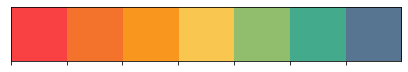

In [11]:
#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

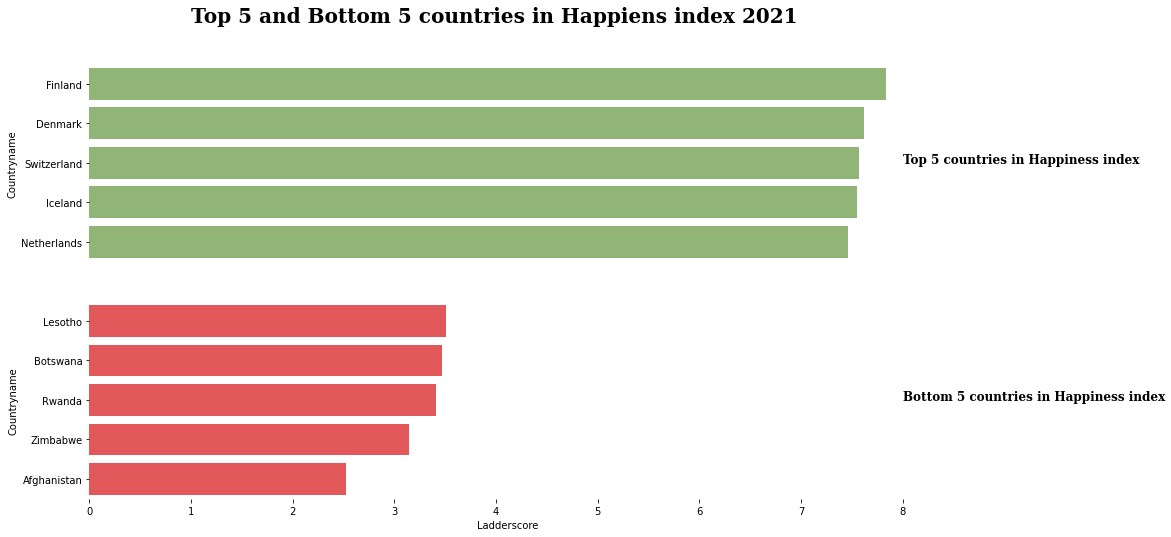

In [12]:
#top 5 and bottom 5 countries in 2021 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiens index 2021", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=HappinessDataFrame.head(5)
bot_5= HappinessDataFrame.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Ladderscore'],y=top_5['Countryname'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Ladderscore'],y=bot_5['Countryname'], color=color[0])
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

Text(9, -0.05, 'There are difference in mean between the Asian countries and EU & American countries')

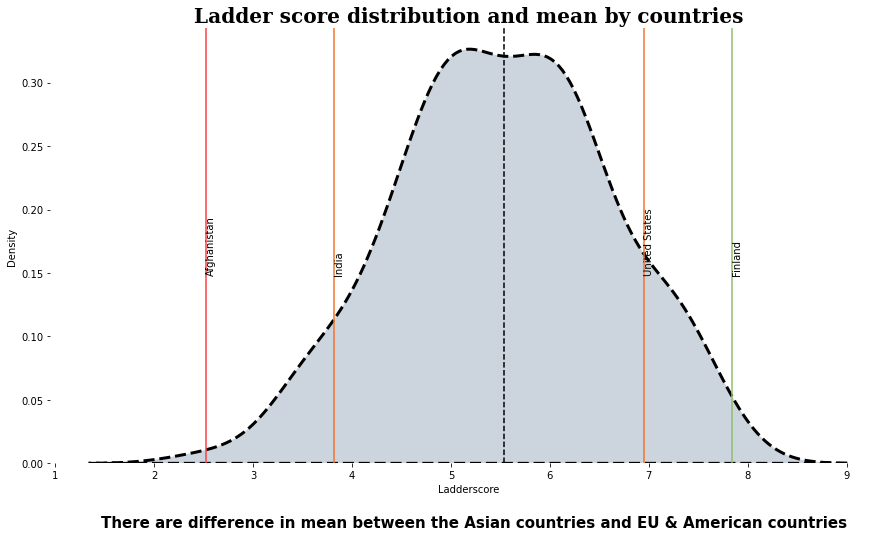

In [13]:
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution and mean by countries",family='Serif', weight='bold', size=20)
sns.kdeplot(HappinessDataFrame['Ladderscore'], fill=True,color=color[-1], shade=True, edgecolor='black', linewidth=3, ls='--', alpha=0.3)
plt.axvline(HappinessDataFrame['Ladderscore'].mean(), c='black',ls='--')
plt.axvline(HappinessDataFrame[HappinessDataFrame['Countryname']=='Finland']['Ladderscore'].mean(), c=color[4])
plt.text(x=HappinessDataFrame[HappinessDataFrame['Countryname']=='Finland']['Ladderscore'].mean(), y=0.15, s='Finland', rotation=90)
plt.axvline(HappinessDataFrame[HappinessDataFrame['Countryname']=='Afghanistan']['Ladderscore'].mean(), c=color[0])
plt.text(x=HappinessDataFrame[HappinessDataFrame['Countryname']=='Afghanistan']['Ladderscore'].mean(), y=0.15, s='Afghanistan', rotation=90)
plt.axvline(HappinessDataFrame[HappinessDataFrame['Countryname']=='India']['Ladderscore'].mean(), c=color[1])
plt.text(x=HappinessDataFrame[HappinessDataFrame['Countryname']=='India']['Ladderscore'].mean(), y=0.15, s='India', rotation=90)
plt.axvline(HappinessDataFrame[HappinessDataFrame['Countryname']=='United States']['Ladderscore'].mean(), c=color[1])
plt.text(x=HappinessDataFrame[HappinessDataFrame['Countryname']=='United States']['Ladderscore'].mean(), y=0.15, s='United States', rotation=90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)
plt.text(x=9,y=-0.05, s="There are difference in mean between the Asian countries and EU & American countries", ha='right', family='San', size=15, weight='bold')

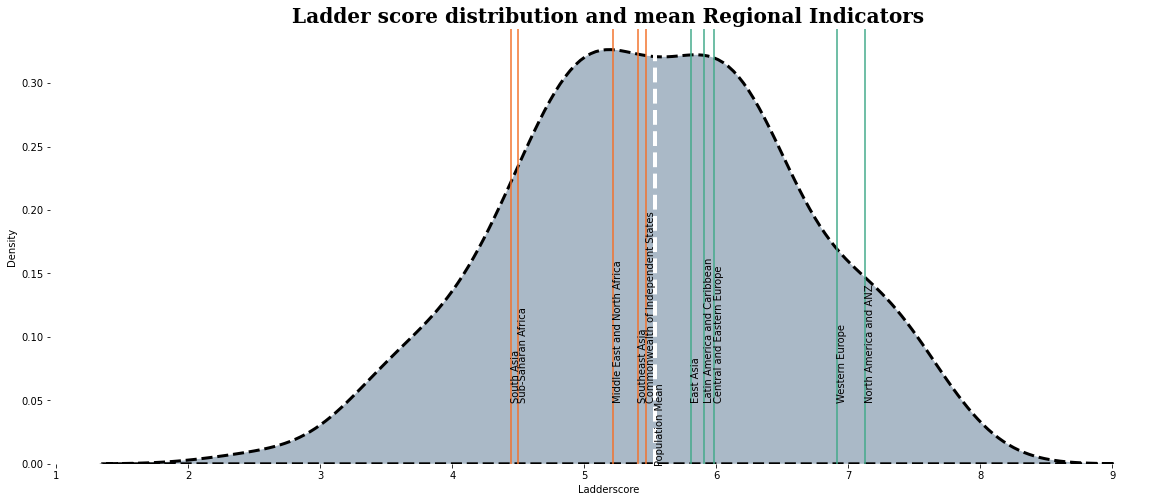

In [14]:
fig=plt.figure(figsize=(20,8))
plt.title("Ladder score distribution and mean Regional Indicators",family='Serif', weight='bold', size=20)
sns.kdeplot(HappinessDataFrame['Ladderscore'], fill=True, shade=True, color=color[-1], linewidth=3, ls='--', edgecolor='black', alpha=0.5)
plt.axvline(x=HappinessDataFrame['Ladderscore'].mean(), linewidth=4, ls='--', color='white')
pop=x=HappinessDataFrame['Ladderscore'].mean()

plt.text(x=HappinessDataFrame['Ladderscore'].mean(),y=0, s='Population Mean', rotation=90)
for i in HappinessDataFrame['Regionalindicator'].unique():
    m=HappinessDataFrame[HappinessDataFrame['Regionalindicator']==i]['Ladderscore'].mean()
    
    if m<pop:
        c=color[1]
    else:
        c=color[5]
    plt.axvline(x=m, color=c)
    plt.text(x=m, y=0.05, rotation=90,s=i)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

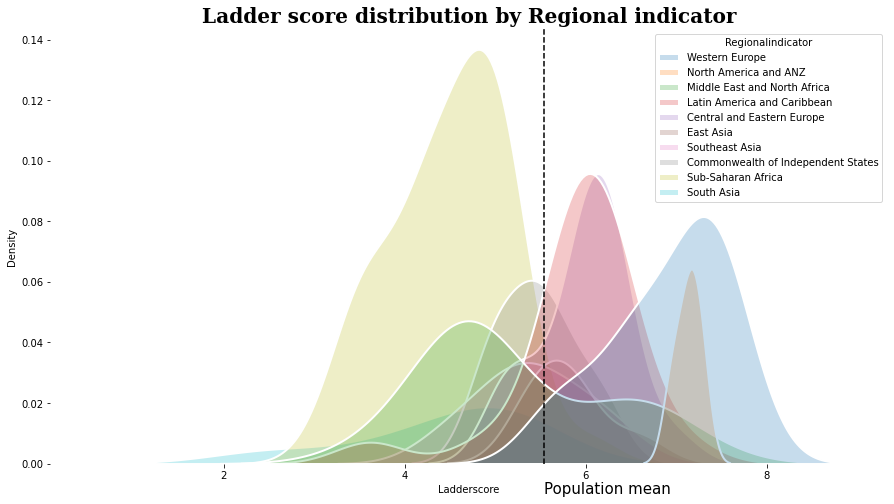

In [15]:
fig=plt.figure(figsize=(15,8))
plt.title("Ladder score distribution by Regional indicator",family='Serif', weight='bold', size=20)
sns.kdeplot(HappinessDataFrame['Ladderscore'], fill=True,hue=HappinessDataFrame['Regionalindicator'], color=color, shade=True, linewidth=2, edgecolor='white', multiple='layer')
plt.axvline(HappinessDataFrame['Ladderscore'].mean(), c='black',ls='--')
plt.text(x=HappinessDataFrame['Ladderscore'].mean(),y=-0.01,s='Population mean', size=15)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)


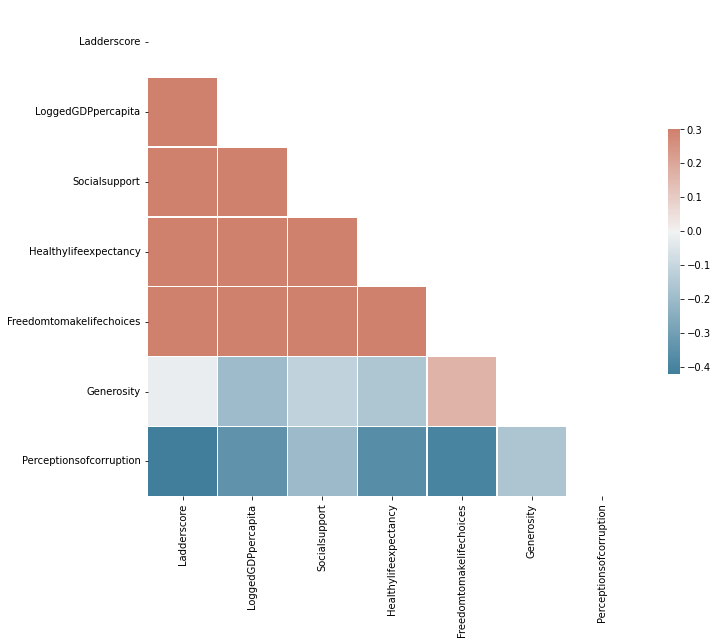

In [16]:
corr=HappinessDataFrame.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### As expected, from the figure above, we find that GDP per capita, sociall support, LifeExpectancy and Freedom are positively correlated with happiness.
#### Perception of corruption is negativel correlated with happiness (LadderScore)

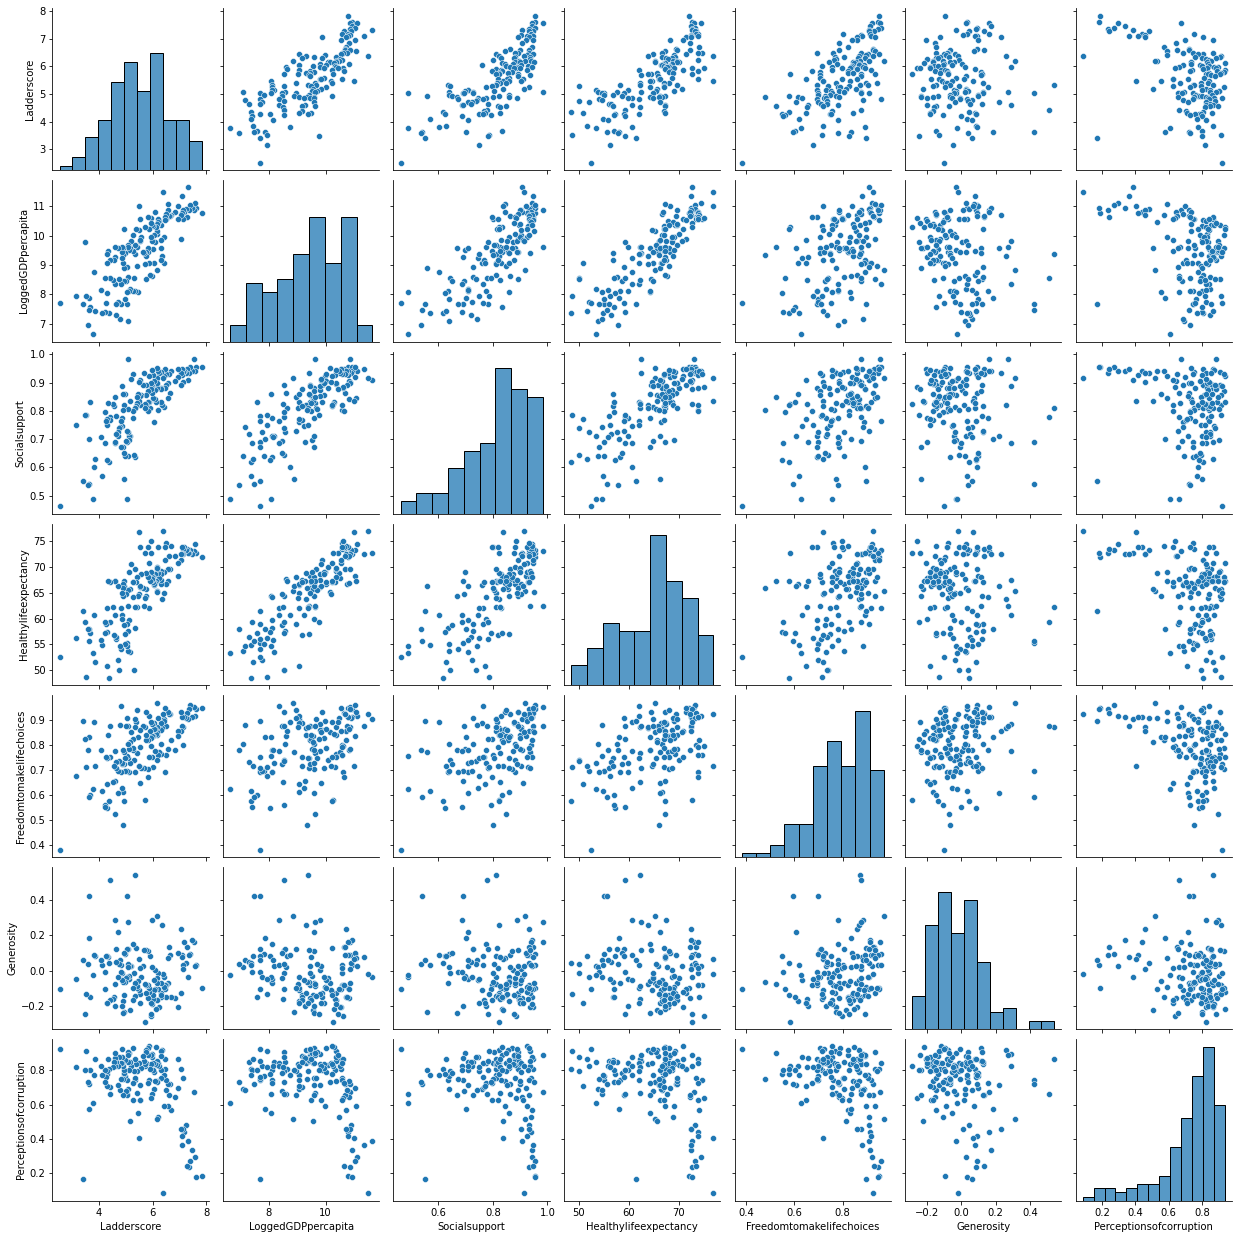

In [17]:
sns.pairplot(HappinessDataFrame)

In [18]:
### We cast "Ladder score" as a categorical variable

bins = [0, 3.5, 5.0, 7.5, 10]
labels = [ 'Low', 'Medium','High', 'Top']
HappinessDataFrame['LadderScore_Binned'] = pd.cut(x = HappinessDataFrame['Ladderscore'], bins = bins, labels = labels, include_lowest = True)

In [19]:
HappinessDataFrame.groupby('LadderScore_Binned').count()

,Ladderscore,Countryname,Regionalindicator,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption
LadderScore_Binned,,,,,,,,,
Low,4,4,4,4,4,4,4,4,4
Medium,44,44,44,44,44,44,44,44,44
High,97,97,97,97,97,97,97,97,97
Top,4,4,4,4,4,4,4,4,4


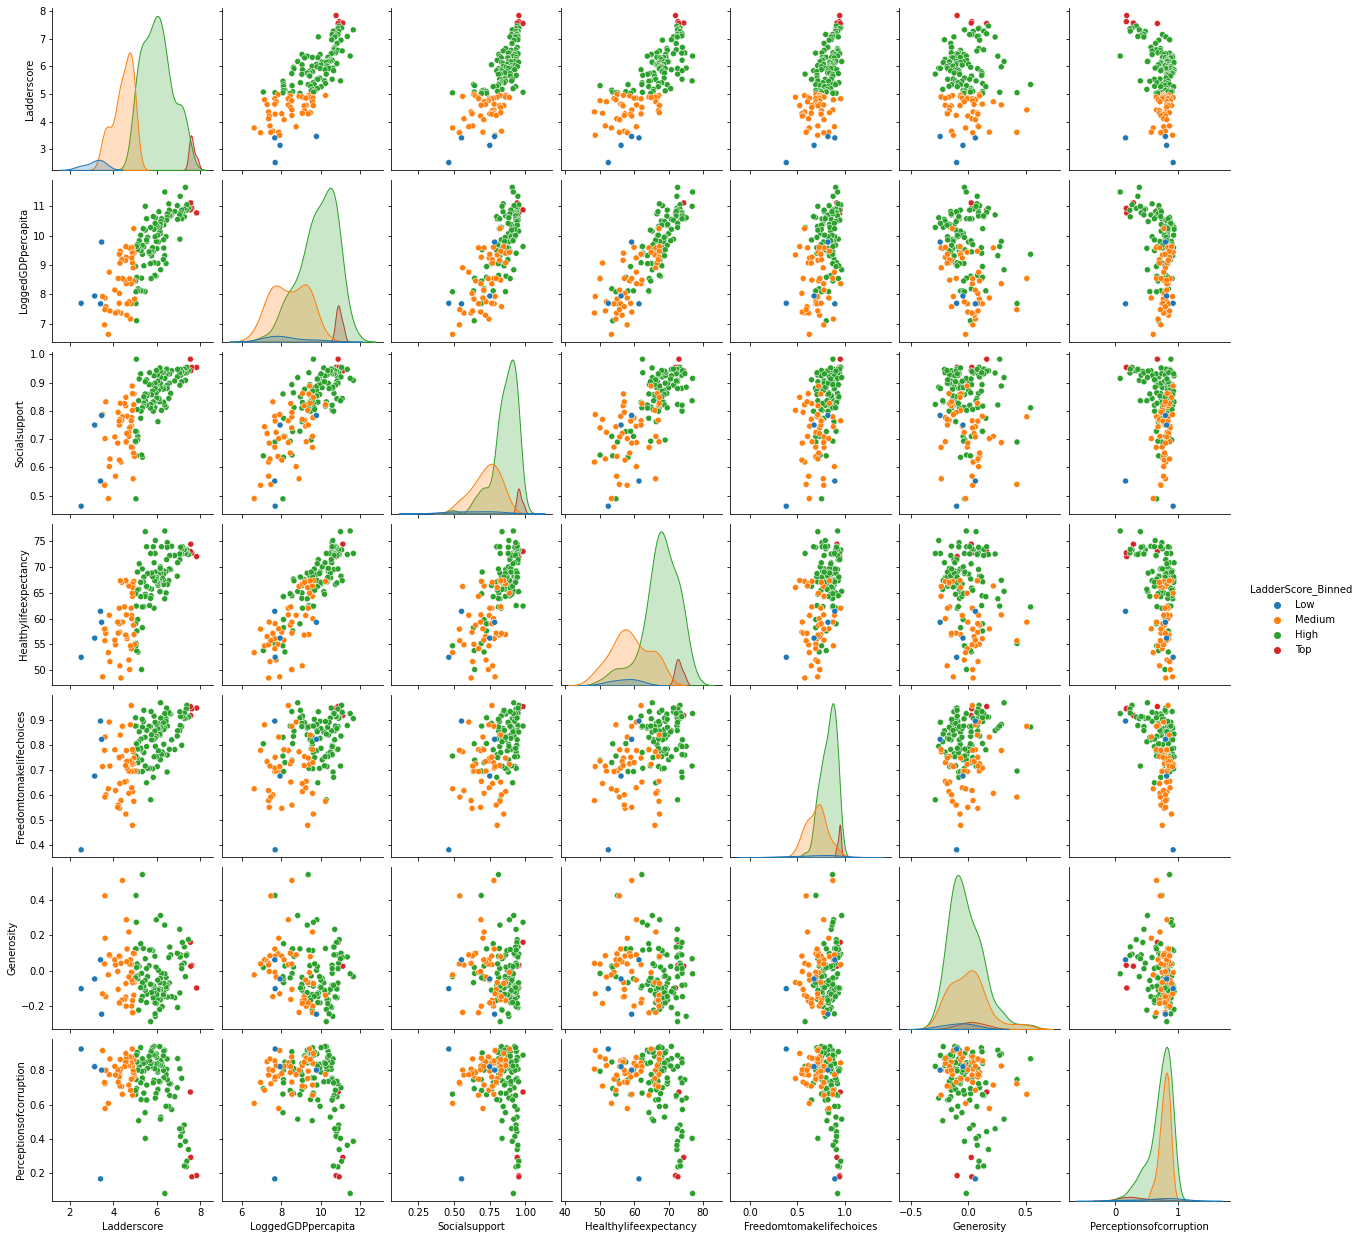

In [20]:
sns.pairplot(HappinessDataFrame[['Ladderscore', 'LoggedGDPpercapita', 'Socialsupport', 'Healthylifeexpectancy','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption','LadderScore_Binned']],hue='LadderScore_Binned')

## 1. Initial model

#### We will assume that the random variable apply is an ordinal outcome with four categories: "Low","Medium",'High" and "Top".

####  $P(Y \le j)$ is the cummulative probability of Y less or equal to a specific category: "Low","Medium",'High" and "Top".

#### The odds of being less or equal a particular category can be defined as:

$\frac{P(Y \le j)}{P(Y> j)}$


#### We assume a logit function, this means that we are assuming that the log odds of the response variable can be modeled as a linear combination of the factors under consideration.

$ logit(P(Y \le j))=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $


## 2. Estimation of the parameters

#### Given the ordered nature of the response variable we fit an ordered logit model

#### We consider the following factors: 

1. Logged GDP per capita
2. Social support
3. Healthy life expectancy
4. Freedom to make life choices
5. Generosity - less likely
6. Perceptions of corruption

In [21]:
HappinessDataFrame.columns.values

array(['Ladderscore', 'Countryname', 'Regionalindicator',
       'LoggedGDPpercapita', 'Socialsupport', 'Healthylifeexpectancy',
       'Freedomtomakelifechoices', 'Generosity',
       'Perceptionsofcorruption', 'LadderScore_Binned'], dtype=object)

In [22]:
HappinessDataFrame[['LadderScore_Binned','LoggedGDPpercapita','Socialsupport','Healthylifeexpectancy','Freedomtomakelifechoices','Generosity','Perceptionsofcorruption']]

,LadderScore_Binned,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption
0,Top,10.775,0.954,72.000,0.949,-0.098,0.186
1,Top,10.933,0.954,72.700,0.946,0.030,0.179
2,Top,11.117,0.942,74.400,0.919,0.025,0.292
3,Top,10.878,0.983,73.000,0.955,0.160,0.673
4,High,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...
144,Medium,7.926,0.787,48.700,0.715,-0.131,0.915
145,Low,9.782,0.784,59.269,0.824,-0.246,0.801
146,Low,7.676,0.552,61.400,0.897,0.061,0.167
147,Low,7.943,0.750,56.201,0.677,-0.047,0.821


In [23]:
reg_1 = OrderedModel.from_formula("LadderScore_Binned ~ LoggedGDPpercapita+Socialsupport+Healthylifeexpectancy+Freedomtomakelifechoices+Generosity+Perceptionsofcorruption", HappinessDataFrame,
                                      distr='logit')
results = reg_1.fit(method='bfgs')
results.summary()




Optimization terminated successfully.
         Current function value: 0.481759
         Iterations: 78
         Function evaluations: 83
         Gradient evaluations: 83


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     LadderScore_Binned   Log-Likelihood:                -71.782
Model:                   OrderedModel   AIC:                             161.6
Method:            Maximum Likelihood   BIC:                             188.6
Date:                Tue, 24 Jan 2023                                         
Time:                        07:43:14                                         
No. Observations:                 149                                         
Df Residuals:                     140                                         
Df Model:                           9                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
LoggedGDPpercapita           0.4896      0.448      1.093      0.274      -0.388       1.368
Socialsupport                6.3765      3.209      1.987      0.047       0.087      12.666
Healthylifeexpectancy        0.0971      0.065      1.494      0.135      -0.030       0.225
Freedomtomakelifechoices     8.3738      2.466      3.396      0.001       3.541      13.207
Generosity                   1.5163      1.671      0.908      0.364      -1.758       4.791
Perceptionsofcorruption     -1.8902      1.793     -1.055      0.292      -5.403       1.623
Low/Medium                  15.1928      3.405      4.462      0.000       8.519      21.866
Medium/High                  1.5485      0.162      9.586      0.000       1.232       1.865
High/Top                     1.9884      0.137     14.542      0.000       1.720       2.256
============================================================================================
"""

In [24]:
reg_1 = OrderedModel.from_formula("LadderScore_Binned ~ LoggedGDPpercapita+Socialsupport+Healthylifeexpectancy+Freedomtomakelifechoices+Generosity+Perceptionsofcorruption", HappinessDataFrame,
                                      distr='logit')
results = reg_1.fit(method='bfgs')
results.summary()

Optimization terminated successfully.
         Current function value: 0.481759
         Iterations: 78
         Function evaluations: 83
         Gradient evaluations: 83


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     LadderScore_Binned   Log-Likelihood:                -71.782
Model:                   OrderedModel   AIC:                             161.6
Method:            Maximum Likelihood   BIC:                             188.6
Date:                Tue, 24 Jan 2023                                         
Time:                        07:43:15                                         
No. Observations:                 149                                         
Df Residuals:                     140                                         
Df Model:                           9                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
LoggedGDPpercapita           0.4896      0.448      1.093      0.274      -0.388       1.368
Socialsupport                6.3765      3.209      1.987      0.047       0.087      12.666
Healthylifeexpectancy        0.0971      0.065      1.494      0.135      -0.030       0.225
Freedomtomakelifechoices     8.3738      2.466      3.396      0.001       3.541      13.207
Generosity                   1.5163      1.671      0.908      0.364      -1.758       4.791
Perceptionsofcorruption     -1.8902      1.793     -1.055      0.292      -5.403       1.623
Low/Medium                  15.1928      3.405      4.462      0.000       8.519      21.866
Medium/High                  1.5485      0.162      9.586      0.000       1.232       1.865
High/Top                     1.9884      0.137     14.542      0.000       1.720       2.256
============================================================================================
"""

#### LoggedGDP is not statistically significant, therefore we have it removed from the model.

In [25]:
reg_2 = OrderedModel.from_formula("LadderScore_Binned ~ Socialsupport+Healthylifeexpectancy+Freedomtomakelifechoices+Generosity+Perceptionsofcorruption", HappinessDataFrame,
                                      distr='logit')
results = reg_2.fit(method='bfgs')
results.summary()

Optimization terminated successfully.
         Current function value: 0.485776
         Iterations: 75
         Function evaluations: 83
         Gradient evaluations: 83


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     LadderScore_Binned   Log-Likelihood:                -72.381
Model:                   OrderedModel   AIC:                             160.8
Method:            Maximum Likelihood   BIC:                             184.8
Date:                Tue, 24 Jan 2023                                         
Time:                        07:43:16                                         
No. Observations:                 149                                         
Df Residuals:                     141                                         
Df Model:                           8                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Socialsupport                7.9361      2.888      2.748      0.006       2.275      13.597
Healthylifeexpectancy        0.1443      0.050      2.880      0.004       0.046       0.242
Freedomtomakelifechoices     8.2493      2.457      3.357      0.001       3.433      13.066
Generosity                   1.1535      1.603      0.720      0.472      -1.988       4.295
Perceptionsofcorruption     -1.9727      1.765     -1.117      0.264      -5.433       1.488
Low/Medium                  14.8315      3.384      4.383      0.000       8.200      21.463
Medium/High                  1.5402      0.162      9.528      0.000       1.223       1.857
High/Top                     1.9646      0.133     14.791      0.000       1.704       2.225
============================================================================================
"""

#### Generosity is not statistically significant, therefore we have it removed from the model.

In [26]:
reg_3 = OrderedModel.from_formula("LadderScore_Binned ~ Socialsupport+Healthylifeexpectancy+Freedomtomakelifechoices+Perceptionsofcorruption", HappinessDataFrame,
                                      distr='logit')
results = reg_3.fit(method='bfgs')
results.summary()

Optimization terminated successfully.
         Current function value: 0.487553
         Iterations: 63
         Function evaluations: 72
         Gradient evaluations: 72


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     LadderScore_Binned   Log-Likelihood:                -72.645
Model:                   OrderedModel   AIC:                             159.3
Method:            Maximum Likelihood   BIC:                             180.3
Date:                Tue, 24 Jan 2023                                         
Time:                        07:43:16                                         
No. Observations:                 149                                         
Df Residuals:                     142                                         
Df Model:                           7                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Socialsupport                7.7266      2.846      2.715      0.007       2.149      13.304
Healthylifeexpectancy        0.1364      0.048      2.820      0.005       0.042       0.231
Freedomtomakelifechoices     8.6770      2.400      3.615      0.000       3.973      13.381
Perceptionsofcorruption     -2.0593      1.739     -1.184      0.236      -5.468       1.349
Low/Medium                  14.4368      3.316      4.353      0.000       7.937      20.937
Medium/High                  1.5428      0.162      9.513      0.000       1.225       1.861
High/Top                     1.9549      0.131     14.917      0.000       1.698       2.212
============================================================================================
"""

#### Perceptionsofcorruption is not statistically significant, therefore we have it removed from the model.

In [27]:
reg_4 = OrderedModel.from_formula("LadderScore_Binned ~ Socialsupport+Healthylifeexpectancy+Freedomtomakelifechoices", HappinessDataFrame,
                                      distr='logit')
results = reg_4.fit(method='bfgs')
results.summary()

Optimization terminated successfully.
         Current function value: 0.492479
         Iterations: 52
         Function evaluations: 62
         Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     LadderScore_Binned   Log-Likelihood:                -73.379
Model:                   OrderedModel   AIC:                             158.8
Method:            Maximum Likelihood   BIC:                             176.8
Date:                Tue, 24 Jan 2023                                         
Time:                        07:43:17                                         
No. Observations:                 149                                         
Df Residuals:                     143                                         
Df Model:                           6                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Socialsupport                7.2217      2.807      2.573      0.010       1.721      12.722
Healthylifeexpectancy        0.1471      0.048      3.089      0.002       0.054       0.240
Freedomtomakelifechoices     9.3698      2.353      3.982      0.000       4.757      13.982
Low/Medium                  16.7540      2.771      6.047      0.000      11.324      22.184
Medium/High                  1.5637      0.161      9.694      0.000       1.248       1.880
High/Top                     1.8880      0.113     16.769      0.000       1.667       2.109
============================================================================================
"""

#### In the case of ordinal responses it is easier to interpret the results in terms of odds ratios, rather than log of odds ratios

#### We compute the exponential of the coefficients

In [28]:
round(np.exp(results.params),2)

Socialsupport                   1368.87
Healthylifeexpectancy              1.16
Freedomtomakelifechoices       11728.55
Low/Medium                  18887680.81
Medium/High                        4.78
High/Top                           6.61
dtype: float64

## 3. Model interpretation:

#### Based on the previous results.

#### 1. One unit increase in Social Support the odds of being more happy is 1368.85 times larger, holding constant all other variables.

#### 2. One unit increase in Healthy Life Expectancy the odds of being more happy is 1.16 times larger, holding constant all other variables.

#### 3. One unit increase in Freedom to make life choices the odds of being more happy is 18887680.81 times larger, holding constant all other variables.



###4. Ex-post Analysis

#### based on the results of the  model we conclude that social support, healthy life expectancy and freedom to make choices are important factors driving happiness.

In [29]:
HappinessDataFrame.columns.values

array(['Ladderscore', 'Countryname', 'Regionalindicator',
       'LoggedGDPpercapita', 'Socialsupport', 'Healthylifeexpectancy',
       'Freedomtomakelifechoices', 'Generosity',
       'Perceptionsofcorruption', 'LadderScore_Binned'], dtype=object)

In [30]:
X=HappinessDataFrame




In [31]:
Y_predicted=results.predict(X)
Y_predicted.rename(columns={0:"Low",1:"Medium",2:"High",3:"Top"},inplace=True)



In [32]:
Y_predicted

,Low,Medium,High,Top
0,0.000067,0.007775,0.846115,0.146043
1,0.000062,0.007219,0.837093,0.155627
2,0.000068,0.007890,0.847832,0.144210
3,0.000044,0.005160,0.789457,0.205339
4,0.000096,0.011163,0.882632,0.106109
...,...,...,...,...
144,0.057790,0.821422,0.120602,0.000186
145,0.004747,0.356704,0.636167,0.002382
146,0.009309,0.517904,0.471576,0.001211
147,0.036567,0.781759,0.181374,0.000300


In [33]:
HappinessDataFramePredictions=pd.concat([X,Y_predicted],axis=1)

In [34]:
HappinessDataFramePredictions

,Ladderscore,Countryname,Regionalindicator,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,LadderScore_Binned,Low,Medium,High,Top
0,7.842,Finland,Western Europe,10.775,0.954,72.000,0.949,-0.098,0.186,Top,0.000067,0.007775,0.846115,0.146043
1,7.620,Denmark,Western Europe,10.933,0.954,72.700,0.946,0.030,0.179,Top,0.000062,0.007219,0.837093,0.155627
2,7.571,Switzerland,Western Europe,11.117,0.942,74.400,0.919,0.025,0.292,Top,0.000068,0.007890,0.847832,0.144210
3,7.554,Iceland,Western Europe,10.878,0.983,73.000,0.955,0.160,0.673,Top,0.000044,0.005160,0.789457,0.205339
4,7.464,Netherlands,Western Europe,10.932,0.942,72.400,0.913,0.175,0.338,High,0.000096,0.011163,0.882632,0.106109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,Lesotho,Sub-Saharan Africa,7.926,0.787,48.700,0.715,-0.131,0.915,Medium,0.057790,0.821422,0.120602,0.000186
145,3.467,Botswana,Sub-Saharan Africa,9.782,0.784,59.269,0.824,-0.246,0.801,Low,0.004747,0.356704,0.636167,0.002382
146,3.415,Rwanda,Sub-Saharan Africa,7.676,0.552,61.400,0.897,0.061,0.167,Low,0.009309,0.517904,0.471576,0.001211
147,3.145,Zimbabwe,Sub-Saharan Africa,7.943,0.750,56.201,0.677,-0.047,0.821,Low,0.036567,0.781759,0.181374,0.000300


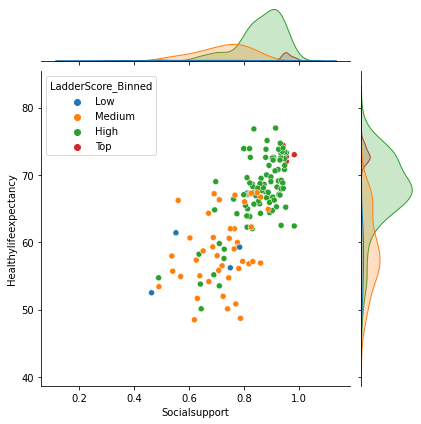

In [35]:
sns.jointplot(data=HappinessDataFramePredictions, x='Socialsupport',y='Healthylifeexpectancy',hue='LadderScore_Binned')

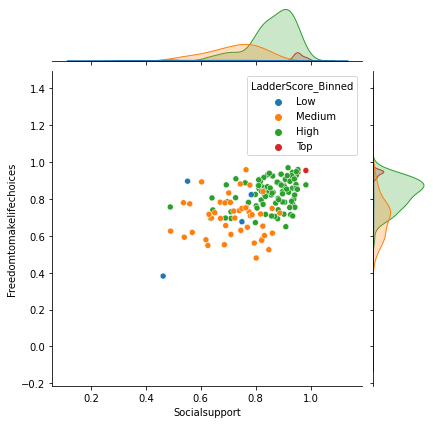

In [36]:
sns.jointplot(data=HappinessDataFramePredictions, x='Socialsupport',y='Freedomtomakelifechoices',hue='LadderScore_Binned')

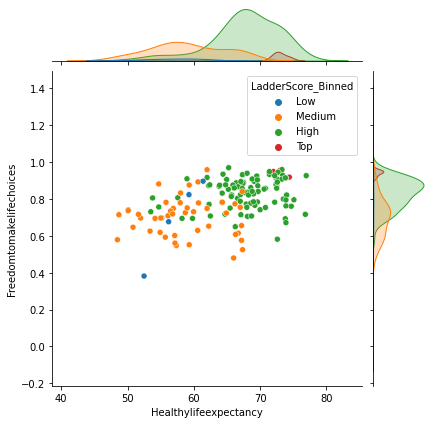

In [37]:
sns.jointplot(data=HappinessDataFramePredictions, x='Healthylifeexpectancy',y='Freedomtomakelifechoices',hue='LadderScore_Binned')